In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
# setting the style for seaborn graphs
plt.style.use(['dark_background','seaborn-muted', 'seaborn-poster'])

# Load & Inspection

In [5]:
path = r"Stars.csv"
df = pd.read_csv(path)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temperature     240 non-null    int64  
 1   L               240 non-null    float64
 2   R               240 non-null    float64
 3   A_M             240 non-null    float64
 4   Color           240 non-null    object 
 5   Spectral_Class  240 non-null    object 
 6   Type            240 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0


# Data Cleaning

In [6]:
# stating the number of rows and columns in the data set
print(f"This data set has {df.shape[0]} rows and {df.shape[1]} columns.")

This data set has 240 rows and 7 columns.


In [8]:
df["Color"].unique()

array(['Red', 'Blue White', 'White', 'Yellowish White', 'Blue white',
       'Pale yellow orange', 'Blue', 'Blue-white', 'Whitish',
       'yellow-white', 'Orange', 'White-Yellow', 'white', 'yellowish',
       'Yellowish', 'Orange-Red', 'Blue-White'], dtype=object)

In [9]:
df["Type"].unique()

array([0, 1, 2, 3, 4, 5], dtype=int64)

In [11]:
df.describe(include = "object")

,Color,Spectral_Class
count,240,240
unique,17,7
top,Red,M
freq,112,111


In [12]:
# checking for correlations numerically
corr = df.corr()
df.corr()

,Temperature,L,R,A_M,Type
Temperature,1.000000,0.393404,0.064216,-0.420261,0.411129
L,0.393404,1.000000,0.526516,-0.692619,0.676845
R,0.064216,0.526516,1.000000,-0.608728,0.660975
A_M,-0.420261,-0.692619,-0.608728,1.000000,-0.955276
Type,0.411129,0.676845,0.660975,-0.955276,1.000000


Text(0.5, 1.0, 'Star Numerical Correlations')

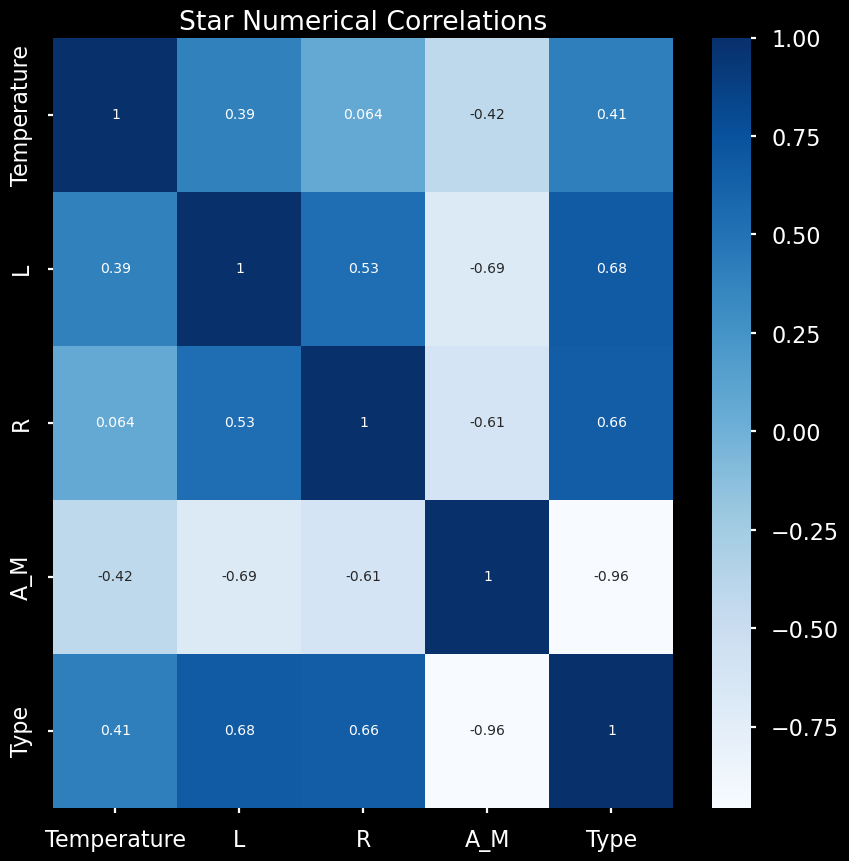

In [24]:
# generating a heatmap of correlations
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(corr, cmap = "Blues", annot = True)
for tick in ax.get_xticklabels():
    tick.set_rotation(0)
ax.set_title("Star Numerical Correlations")

Text(0.5, 1.0, 'Star Color')

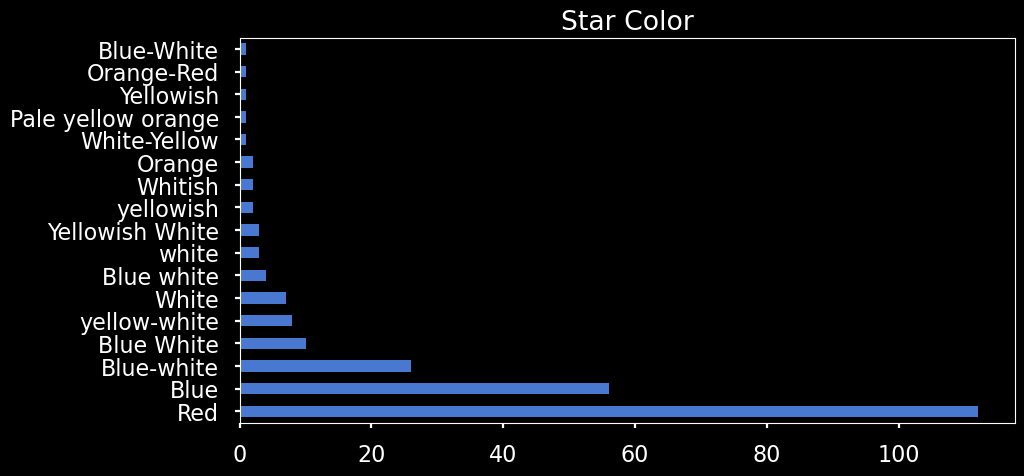

In [18]:
# generating a bar graph of star color
fig, ax = plt.subplots(figsize=(10,5))
ax = df["Color"].value_counts().plot(kind = "barh")
ax.set_title("Star Color")

Text(0.5, 1.0, 'Star Type')

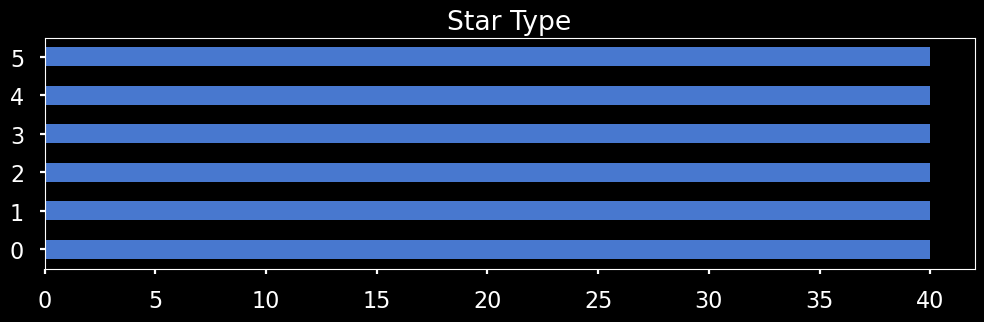

In [23]:
# generating a bar graph of star color
fig, ax = plt.subplots(figsize=(12,3))
ax = df["Type"].value_counts().plot(kind = "barh")
ax.set_title("Star Type")

In [20]:
df["Type"].value_counts()

0    40
1    40
2    40
3    40
4    40
5    40
Name: Type, dtype: int64

There are equal numbers of each star type.

Text(0.5, 1.0, 'Spectral Class')

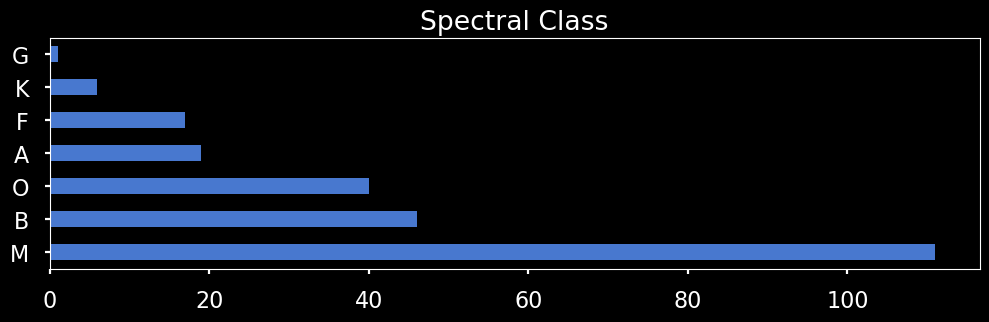

In [27]:
# generating a bar graph of star color
fig, ax = plt.subplots(figsize=(12,3))
ax = df["Spectral_Class"].value_counts().plot(kind = "barh")
ax.set_title("Spectral Class")

https://en.wikipedia.org/wiki/Stellar_classification

Text(0.5, 0, 'Temperature')

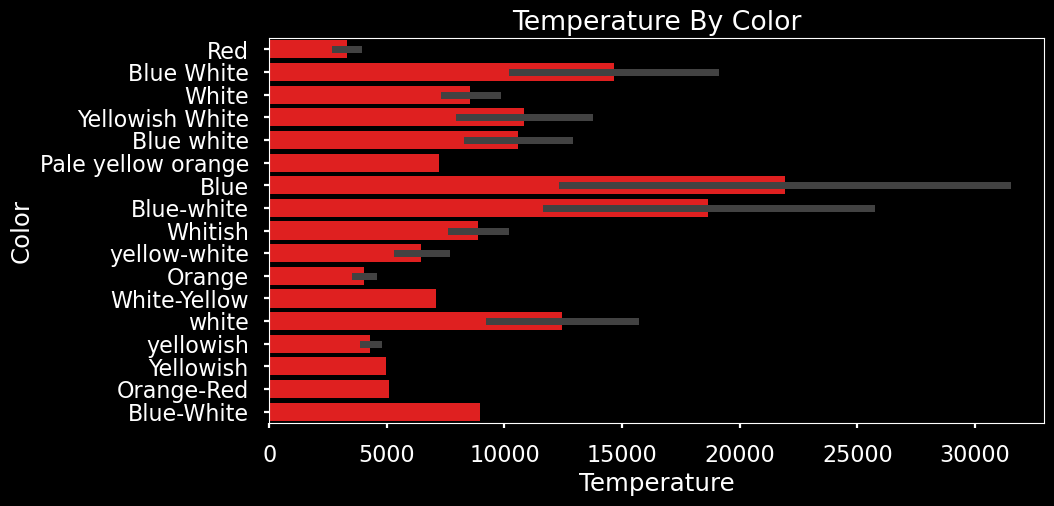

In [37]:
cols = ["Red" if x == "Red" else "Blue" for x in df.Color]

fig, ax = plt.subplots(figsize=(10,5))
ax = sns.barplot(x="Temperature", y="Color", data = df, palette = cols, errorbar = "sd")
ax.set_title("Temperature By Color")
ax.set_ylabel("Color")
ax.set_xlabel("Temperature")